In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
df = pd.read_csv("Seasons_Stats.csv")
df.head()


,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


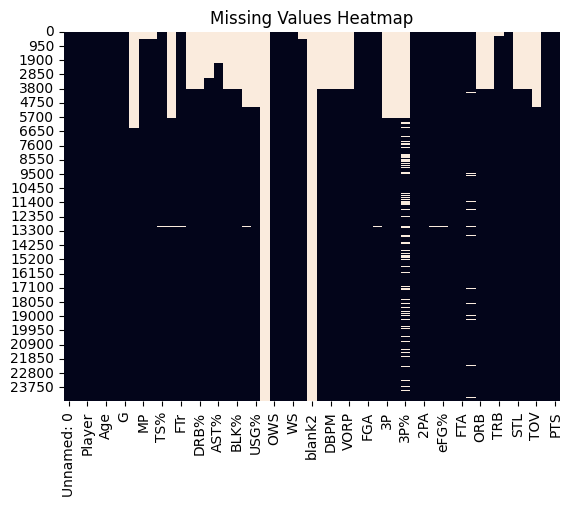

In [4]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


In [5]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [6]:
# Keep only rows where 'PTS' (points) is not null
df = df[df['PTS'].notna()]

# Drop columns with too many nulls (optional)
df = df.dropna(thresh=len(df)*0.5, axis=1)

# Fill remaining nulls with 0
df.fillna(0, inplace=True)


In [7]:
df = df[df['Year'] >= 1980]


In [8]:
# Select numeric features only
numeric_df = df.select_dtypes(include=[np.number])

# Drop target column from features
features = numeric_df.drop(columns=['PTS'])

# Target variable
target = numeric_df['PTS']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [12]:
y_pred = model.predict(X_test_scaled)


In [13]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error: 1.5219876281585033e-24
R2 Score: 1.0


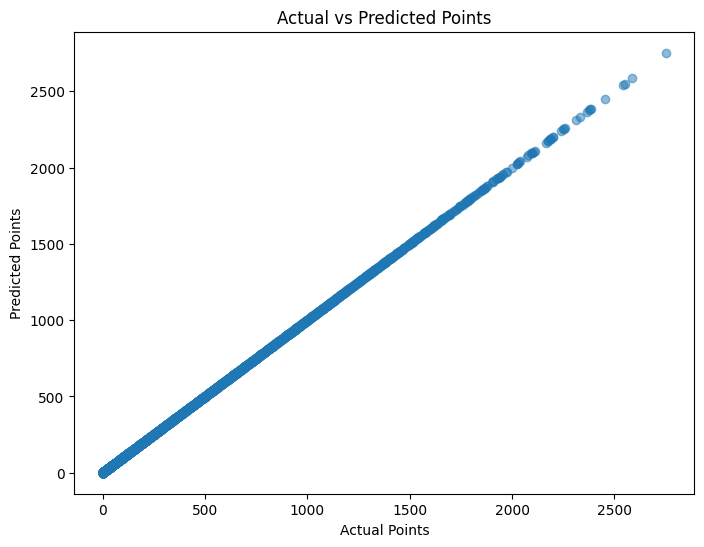

In [14]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.title("Actual vs Predicted Points")
plt.show()


In [15]:
df.to_csv("cleaned_season_stats.csv", index=False)


In [16]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)


RandomForestRegressor()

In [17]:
# Remove 'PTS' from features
features = numeric_df.drop(columns=['PTS'])

# Target
target = numeric_df['PTS']


In [18]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)


In [19]:
print("Random Forest - MSE:", mean_squared_error(y_test, rf_pred))
print("Random Forest - R2 Score:", r2_score(y_test, rf_pred))


Random Forest - MSE: 180.3831218700476
Random Forest - R2 Score: 0.9992210626117284


In [20]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)
ridge_pred = ridge_model.predict(X_test_scaled)

print("Ridge - MSE:", mean_squared_error(y_test, ridge_pred))
print("Ridge - R2 Score:", r2_score(y_test, ridge_pred))


Ridge - MSE: 0.08230644797921852
Ridge - R2 Score: 0.9999996445811062


In [21]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_scaled, y_train)
tree_pred = tree_model.predict(X_test_scaled)

print("Decision Tree - MSE:", mean_squared_error(y_test, tree_pred))
print("Decision Tree - R2 Score:", r2_score(y_test, tree_pred))


Decision Tree - MSE: 589.7815636555731
Decision Tree - R2 Score: 0.9974531823926653


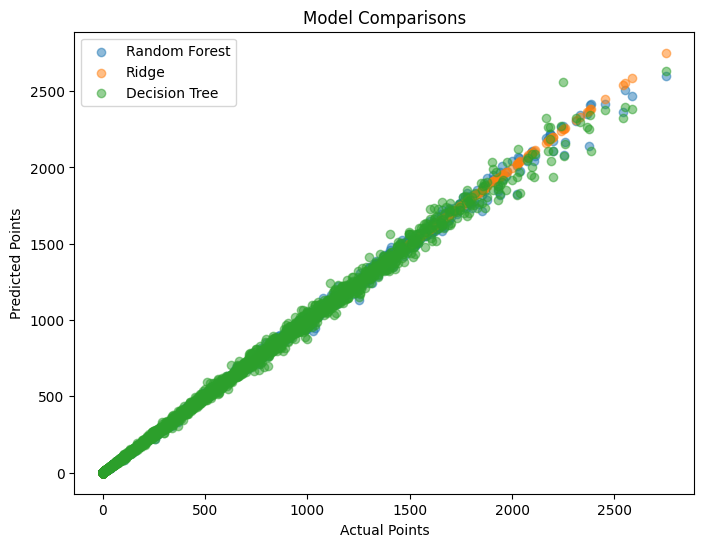

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, rf_pred, alpha=0.5, label="Random Forest")
plt.scatter(y_test, ridge_pred, alpha=0.5, label="Ridge")
plt.scatter(y_test, tree_pred, alpha=0.5, label="Decision Tree")
plt.xlabel("Actual Points")
plt.ylabel("Predicted Points")
plt.legend()
plt.title("Model Comparisons")
plt.show()
